## Observations and Insights 

In [1]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
Mice_Count=len(merge_df["Mouse ID"].unique())
Mice_Count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

opttest=merge_df[merge_df["Mouse ID"]== 'g989'] 
opttest

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Mice_Count=len(clean_df["Mouse ID"].unique())
Mice_Count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean=stats_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=stats_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=stats_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=stats_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=stats_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
analysis_df=round(pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Variance":variance, "SD": sd, "SEM": sem}),2)
analysis_df

,Mean Tumor Volume,Median Tumor Volume,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

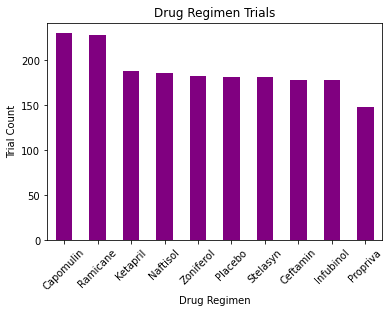

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index

drug_counts.plot(kind="bar", facecolor='purple',)

plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Drug Regimen Trials")
plt.xticks(rotation=45)
plt.show()

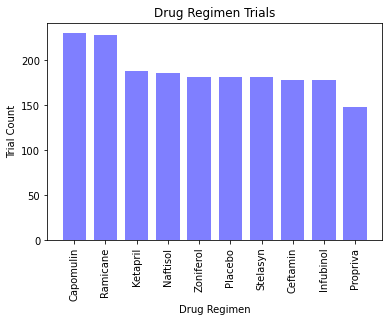

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .75)

plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Drug Regimen Trials")
plt.xticks(rotation=90)

plt.show()

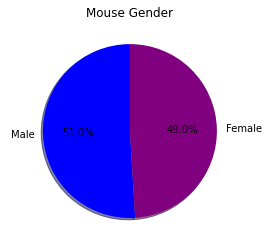

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count=clean_df["Sex"].value_counts()

labels=gender_count.values

sizes=gender_count.values

colors=["blue", "purple"]

gender_count.plot(kind="pie", colors=colors, autopct="%1.1f%%", shadow=True, startangle=90  )

plt.title("Mouse Gender")
plt.ylabel(" ")
plt.show()

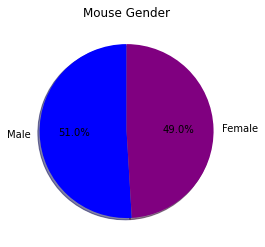

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=clean_df["Sex"].value_counts()

labels=gender_count.index
 
sizes=gender_count.values

colors=["blue", "purple"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Mouse Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merge_df.head()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

sorted_df =merge_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

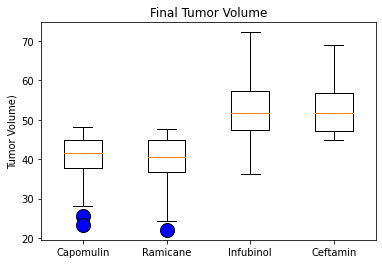

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

data = dict(markerfacecolor='blue',markersize=14)

#Make Box Plot
plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops=data)

#Formatting
plt.title("Final Tumor Volume")
plt.ylabel("Tumor Volume)")
plt.show()

## Line and Scatter Plots

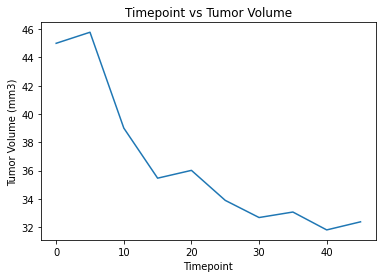

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capo
mouse = clean_df.loc[clean_df['Mouse ID'] == 'r554']


plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume")
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#capo_weight
cap_avg=capo_weight.groupby(["Weight (g)"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Versus Tumor Volume on Capomulin")
plt.show()

KeyError: 'Weight (g)'

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_wght = cap_avg.loc["Weight (g)"]
avg_tumor_vol = cap_avg.loc["Tumor Volume (mm3)"]
# Compute Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(avg_tumor_vol, mouse_wght)
print(f"The correlation between both factors is {round(correlation[0],2)}")


slope, intercept,rvalue, pvalue, stderr= st.linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress, color='blue')
plt.annotate(line_eq,(19,38), fontsize=18, color='purple')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Versus Tumor Volume on Capomulin")
plt.show()